In [1]:
import igraph as ig
import cairo
color_list=['#B15646','#E0D2A3','#A6BACC','#6F7F66','#038C7F','#F0E68C','#FF4500','#90EE90','#FFC0CB','#BA55D3']
graph_size=(300, 200)

In [2]:
# 规则网络
g_reg=ig.Graph()
node_reg=['1','2','3','4','5','6','7','8','9','10']
edge_reg=[('1','2'),('1','3'),('1','4'),('1','5'),('1','6'),('1','7'),('1','8'),('1','9'),('1','10'),
          ('2','3'),('2','4'),('2','5'),('2','6'),('2','7'),('2','8'),('2','9'),('2','10'),
          ('3','4'),('3','5'),('3','6'),('3','7'),('3','8'),('3','9'),('3','10'),
          ('4','5'),('4','6'),('4','7'),('4','8'),('4','9'),('4','10'),
          ('5','6'),('5','7'),('5','8'),('5','9'),('5','10'),
          ('6','7'),('6','8'),('6','9'),('6','10'),
          ('7','8'),('7','9'),('7','10'),
          ('8','9'),('8','10'),
          ('9','10')
         ]
g_reg.add_vertices(node_reg)
g_reg.add_edges(edge_reg)

g_reg.es['width']=3

g_reg.vs['color'] = color_list
g_reg.vs['label'] = node_reg
g_reg.vs['size']=25
g_reg.vs['label_size']=15
out=ig.plot(g_reg,layout=g_reg.layout('kk'),bbox = graph_size)
#out.save('Regular network.png')

In [3]:
# 随机网络
g_er=ig.Graph()
node_er=['1','2','3','4','5','6','7','8','9','10']
edge_er=[('6', '7'), ('9', '8'), ('10', '3'), ('2', '7'), ('5', '7'), ('8', '4'), ('2', '5'), ('1', '3'), ('1', '5'), ('3', '8'), ('6', '9'), ('6', '10'), ('4', '2')]

g_er.add_vertices(node_er)
g_er.add_edges(edge_er)

g_er.es['width']=3

g_er.vs['color'] = color_list[0:8]
g_er.vs['label'] = node_er
g_er.vs['size']=25
g_er.vs['label_size']=15
out=ig.plot(g_er,layout=g_er.layout('kk'),bbox = graph_size)
#out.save('Random network.png')

In [4]:
# WS小世界网络
g_ws=ig.Graph()
node_ws=['1','2','3','4','5','6','7','8','9','10']
edge_ws=[('1','2'),('2','3'),('3','4'),('4','5'),('5','6'),('6','7'),('7','8'),('8','9'),('9','10'),('1','3'),('2','4'),('3','5'),('4','6'),('5','7'),('6','8'),('7','9'),('8','10'),('9','1'),('2','10'),('8','3'),('1','5')]

g_ws.add_vertices(node_ws)
g_ws.add_edges(edge_ws)

g_ws.es['width']=3

g_ws.vs['color'] = color_list[0:8]
g_ws.vs['label'] = node_ws
g_ws.vs['size']=25
g_ws.vs['label_size']=15
out=ig.plot(g_ws,layout=g_ws.layout('kk'),bbox = graph_size)
#out.save('Small world network.png')

In [5]:
# BA无标度网络
g_ba=ig.Graph()
node_ba=['1','2','3','4','5','6','7','8','9','10']
edge_ba=[('1','2'),('1','3'),('1','4'),('1','5'),('2','6'),('3','7'),('2','8'),('3','9'),('3','10')]

g_ba.add_vertices(node_ba)
g_ba.add_edges(edge_ba)

g_ba.es['width']=3

g_ba.vs['color'] = color_list[0:8]
g_ba.vs['label'] = node_ba
g_ba.vs['size']=25
g_ba.vs['label_size']=15
out=ig.plot(g_ba,layout=g_ba.layout('kk'),bbox = graph_size)
#out.save('Free-scale network.png')

In [6]:
import os
print(os.getcwd())

D:\Mrstrlen\Graduation_Project\Python_Code\Jupyter


In [7]:
## 社区检测结果图

import csv
import numpy as np
import BasicFunctionJupter as BF
import matplotlib.pyplot as plt

## 读取Reco_Dataset_Cell得到映射矩阵 
with open("..\..\Data\Reco_Dataset_Cell.csv", "r") as f:
    reader = csv.reader(f)
    data=np.array(list(reader))
region_list=[]
projection_list=[]
for i in data:
    region_list.append(str(i[0]))
    projection_list.append(str(i[1])+'_'+str(i[2]))
region_list=list(set(region_list))
projection_list=list(set(projection_list))

projection_list1=BF.getregionname(projection_list,'side1')
region_list1=BF.getregionname(region_list,1)

## 构建反转矩阵
region_list2=[]
projection_list2=[]
for i in range(0,len(region_list1)):
    region_list2.append(region_list1[i]+'_Con')
    region_list1[i]=region_list1[i]+'_Ips'
for x in projection_list1:
    if 'Con' in x:
        projection_list2.append(x.replace('Con','Ips'))
    else:
        projection_list2.append(x.replace('Ips','Con'))

region_list=region_list1+region_list2 #soma区域列表
projection_list=list(set(projection_list1+projection_list2)) # 投射区域列表

relation_matrix=np.load('..\Save_Data\connection_matrix.npy')


In [8]:
region_list.sort()
projection_list.sort()


## igraph 画图
import igraph as ig
import cairo
import cv2
import math

relation_matrix_single=np.load('..\Save_Data\connection_matrix_single.npy')
g_s = ig.Graph(directed=True)
node_list_s=[]
edge_list_s=[]
edge_weight_s=[]
edge_cost_s=[]
for i in range(0,len(region_list)):
    for j in range(0,len(projection_list)):
        if relation_matrix_single[i,j]>0:
            if region_list[i] not in node_list_s:
                node_list_s.append(region_list[i])
            if projection_list[j] not in node_list_s:
                node_list_s.append(projection_list[j])
            edge_list_s.append((region_list[i],projection_list[j]))
            edge_weight_s.append(relation_matrix_single[i,j])
            edge_cost_s.append(1/relation_matrix_single[i,j])
g_s.add_vertices(node_list_s)
g_s.add_edges(edge_list_s)
g_s.es['weight']=edge_weight_s
g_s.es['cost']=edge_cost_s

g_s.vs['label'] = node_list_s

In [9]:
g=g_s
community_spinglass=g.community_spinglass(weights=g.es['weight'],spins=25,parupdate=False,start_temp=1,stop_temp=0.01,cool_fact=0.99,update_rule="config",gamma=1,implementation="orig")
Q=ig.GraphBase.modularity(g,community_spinglass._membership)
print('community_spinglass:')
print(Q)

community_spinglass:
0.27599195023977074


IGRAPH DNW- 82 116 -- 
+ attr: color (v), label (v), name (v), size (v), cost (e), weight (e)


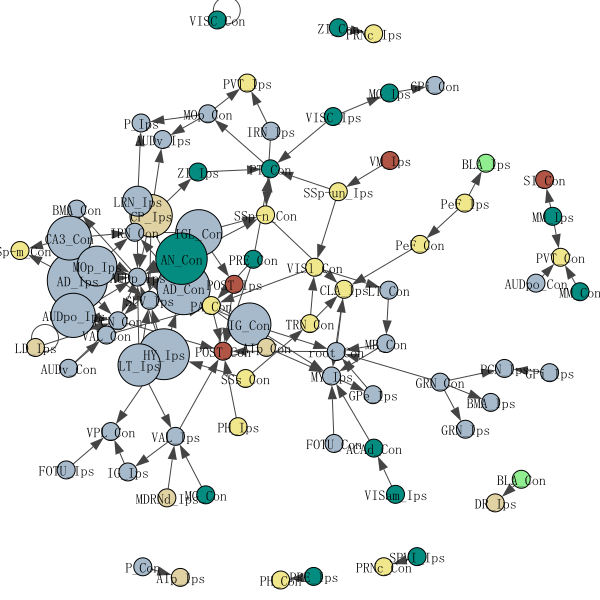

In [22]:
g=g_s
with open("test.csv", "r") as f2:
    reader = csv.reader(f2)
    data_temp = list(reader)
    f2.close()
temp=[]
for x in data_temp:
    temp.append(x[2])

temp_size=[]
# size 
for x in g.hub_score():
    if x<0.3:
        temp_size.append(18)
    else:
        temp_size.append(x*60)
g.vs['size']=temp_size

for k in range(len(g.vs['label'])-1,-1,-1):
    t=g.vs['label'][k].split('_')[0]
    if t not in temp:
        g.delete_vertices(k)

color_list=['#A6BACC','#E0D2A3','#6F7F66','#B15646','#038C7F','#F0E68C','#90EE90','#FF4500','#FFC0CB','#BA55D3']
color_temp=[]
for k in range(0,len(g.vs['label'])):
    t=g.vs['label'][k].split('_')[0]
    color_temp.append(color_list[int(data_temp[temp.index(t)][1])])
g.vs['color']=color_temp

# 删除所有阈值小于的边
for i in range(len(g.es['weight'])-1,-1,-1):
    if g.es['weight'][i]<1:
        g.delete_edges(i)


# 删除孤立点
t=g.degree()
for k in range(len(t)-1,-1,-1):
    if t[k]==0:
        g.delete_vertices(k)
ig.summary(g)
graph_size=(600,400)
ig.plot(g)
